In [12]:
#This notebook is used to produce a custom heatmap using KEGG Decoder results

#required packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML
import matplotlib as mpl
#for saving svg text
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'}
mpl.rcParams.update(new_rc_params)

In [13]:
#list of species in order set by core phylogeny (based on 108 single copy core genes)
species_ordered_108 = ['profundi','mobilis','zhejiangensis','daqiaonensis','segnicrescens','bohaiensis','fonticola',
                      'nanhaiticus','changyiensis','salicampi','lipolyticus','confluentis','halotolerans','vulgaris',
                      'algicola','salarius','gelidimuriae','psychrophilus','M3C','M1C','M2C','M4C','CB1','CBIA','CBIW17','CBIW18',
                      'piscensis','aromaticivorans','salexigens','antarcticus','maritimus','gudaonensis','salsuginis',
                      'adhaerens','flavimaris','manganoxydans','guineae','subterrani','nitratireducens','salinus',
                      'similis','persicus','fuscus','daepoensis','hydrocarbonoclasticus','shengliensis','excellens',
                      'halophilus','vinifirmus','litoralis','lutaoensis','pelagius','santoriniensis']

KEGG_data = pd.read_csv('mbpan_kegg_decoder.txt',sep='\t',header=0) #convert data file into pandas dataframe
df = KEGG_data.set_index('Function') #Replace the index with KEGG pathways/functions
df1 = df.reindex(index=species_ordered_108) #reset the dataframe index to match phylogeny order
df2 = df1.T #transpose the df for plotting ease
df3 = df1.sort_values(by=species_ordered_108,axis=1,ascending=False) #Reorder functions from left to right from most to least complete on average
df4 = df1[df1.columns[df1.max() > 0.5]] #Get the subset of columns each pathway is at least 50% complete in at least one genome

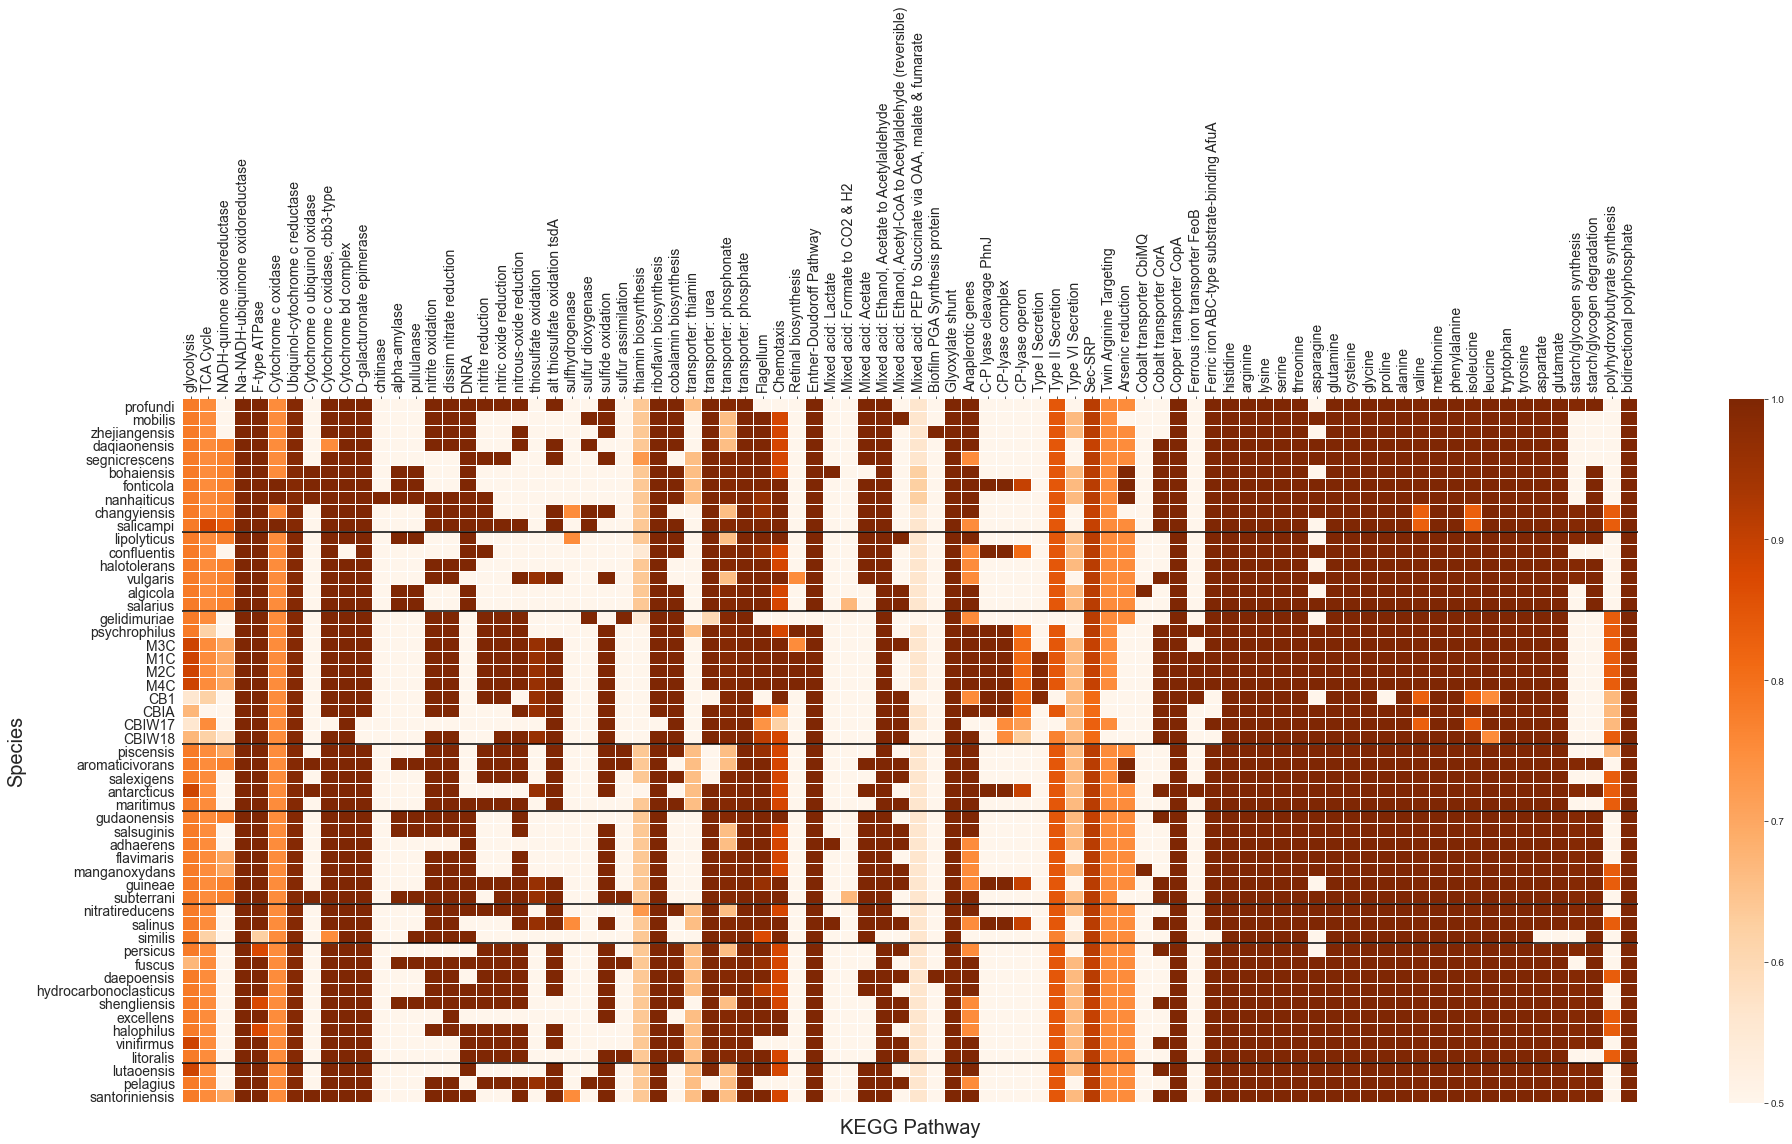

In [18]:
#Set up the heatmap here
sns.set_style('white') #set style from Seaborn options
fig,ax=plt.subplots(figsize=(28,16)) #Establish figure and axes and set size
ax.tick_params(labelsize=14) #adjust the fontsize of axis labels
ax.xaxis.tick_top() #putting the X-axis labels (pathways) on top of the figure
ax.hlines([10,16,26,31,38,41,50],xmin=0,xmax=200, colors='black') #set black lines that divide the rows into Clades
sns.heatmap(df4,cmap='Oranges',linewidths=0.005,vmin=0.5) #create the heatmap using df4 and set color pallette; also set minimum of colorbar to 50%
plt.ylabel('Species',fontsize = 20, labelpad = 10) #set y label title and font and position
plt.xlabel('KEGG Pathway',fontsize = 20, labelpad = 15) #set x label title and font and position
plt.tight_layout() #display the plot with minimum extra boundary

plt.show()
#save it if you want by commenting show and uncommenting savefig
#plt.savefig('../../fig_editing/KEGG_decoder_custom_heatmap.svg',dpi=300,format='svg')

In [8]:
#Use this to display all of the data as an HTML table for exploration
display(HTML(df2.to_html()))

Function,profundi,mobilis,zhejiangensis,daqiaonensis,segnicrescens,bohaiensis,fonticola,nanhaiticus,changyiensis,salicampi,lipolyticus,confluentis,halotolerans,vulgaris,algicola,salarius,gelidimuriae,psychrophilus,M3C,M1C,M2C,M4C,CB1,CBIA,CBIW17,CBIW18,piscensis,aromaticivorans,salexigens,antarcticus,maritimus,gudaonensis,salsuginis,adhaerens,flavimaris,manganoxydans,guineae,subterrani,nitratireducens,salinus,similis,persicus,fuscus,daepoensis,hydrocarbonoclasticus,shengliensis,excellens,halophilus,vinifirmus,litoralis,lutaoensis,pelagius,santoriniensis
glycolysis,0.7800,0.7800,0.7800,0.7800,0.7800,0.7800,0.7800,0.7800,0.7800,0.7800,0.7800,0.7800,0.7800,0.7800,0.7800,0.7800,0.7800,0.7800,0.8900,0.8900,0.8900,0.8900,0.5600,0.6700,0.5600,0.670,0.7800,0.7800,0.7800,0.8900,0.7800,0.7800,0.7800,0.7800,0.7800,0.7800,0.7800,0.7800,0.7800,0.7800,0.7800,0.7800,0.6700,0.7800,0.7800,0.7800,0.7800,0.7800,0.8900,0.7800,0.8900,0.7800,0.7800
gluconeogenesis,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
TCA Cycle,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.8800,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.6200,0.7500,0.7500,0.7500,0.7500,0.6200,0.3800,0.7500,0.620,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.6200,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500
NAD(P)H-quinone oxidoreductase,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
NADH-quinone oxidoreductase,0.0700,0.0000,0.0000,0.7700,0.7700,0.7700,0.7700,0.7700,0.7700,0.8400,0.7700,0.0000,0.7700,0.7700,0.7700,0.7700,0.0000,0.0000,0.7000,0.7000,0.7000,0.7000,0.0000,0.2100,0.0000,0.560,0.7000,0.7700,0.0000,0.0000,0.0000,0.7700,0.0000,0.0000,0.7000,0.7000,0.7700,0.7700,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.7000
Na-NADH-ubiquinone oxidoreductase,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
F-type ATPase,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.6250,0.8750,1.0000,1.0000,1.0000,0.8750,1.0000,0.8750,1.0000,1.0000,1.0000,1.0000,1.0000
V-type ATPase,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Cytochrome c oxidase,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,1.0000,1.0000,0.7500,1.0000,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.750,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500,0

In [17]:
#Search table using function/pathway name to get more information about completeness e.g.:
print('Entner-Doudoroff pathway mean completeness for all spp:')
print(df2.loc['Entner-Doudoroff Pathway'].mean())
print('')
print('Glycolysis pathway mean completeness for all spp:')
print(df2.loc['glycolysis'].mean())

Entner-Doudoroff pathway mean completeness for all spp:
0.9858490566037735

Glycolysis pathway mean completeness for all spp:
0.7800000000000005


In [28]:
#estimations of pathway completeness for Clade III members, excluding MAGs since they are not complete genomes
clade_iii_kegg_df = df2[['M1C','M2C','M3C','M4C','psychrophilus','gelidimuriae']]
display(HTML(clade_iii_kegg_df.to_html()))

Function,M1C,M2C,M3C,M4C,psychrophilus,gelidimuriae
glycolysis,0.8900,0.8900,0.8900,0.8900,0.7800,0.7800
gluconeogenesis,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
TCA Cycle,0.7500,0.7500,0.7500,0.7500,0.6200,0.7500
NAD(P)H-quinone oxidoreductase,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
NADH-quinone oxidoreductase,0.7000,0.7000,0.7000,0.7000,0.0000,0.0000
Na-NADH-ubiquinone oxidoreductase,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
F-type ATPase,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
V-type ATPase,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Cytochrome c oxidase,0.7500,0.7500,0.7500,0.7500,0.7500,0.7500
Ubiquinol-cytochrome c reductase,0.9900,0.9900,0.9900,0.9900,0.9900,0.9900


In [34]:
#mean pathway completeness levels for Clade III discussed in the manuscript can be calculated with this data
#for example:
print('Entner-Doudoroff pathway mean completeness for Clade III:')
print(clade_iii_kegg_df.loc['Entner-Doudoroff Pathway'].mean())
print('\nGlycolysis pathway mean completeness for Clade III:')
print(clade_iii_kegg_df.loc['glycolysis'].mean())
print('\nGlyoxylate shunt pathway mean completeness for Clade III:')
print(clade_iii_kegg_df.loc['Glyoxylate shunt'].mean())
print('\nNitrite oxidation pathway mean completeness for Clade III:')
print(clade_iii_kegg_df.loc['nitrite oxidation'].mean())
print('\nDissimilatory nitrate reduction pathway mean completeness for Clade III:')
print(clade_iii_kegg_df.loc['dissim nitrate reduction'].mean())
print('\nNitric oxide reduction mean completeness for Clade III:')
print(clade_iii_kegg_df.loc['nitric oxide reduction'].mean())
print('\nNitrous oxide reduction mean completeness for Clade III:')
print(clade_iii_kegg_df.loc['nitrous-oxide reduction'].mean())
print('\nDissimilatory nitrate reduction to ammonium pathway mean completeness for Clade III:')
print(clade_iii_kegg_df.loc['DNRA'].mean())

Entner-Doudoroff pathway mean completeness for Clade III:
0.875

Glycolysis pathway mean completeness for Clade III:
0.8533333333333334

Glyoxylate shunt pathway mean completeness for Clade III:
1.0

Nitrite oxidation pathway mean completeness for Clade III:
1.0

Dissimilatory nitrate reduction pathway mean completeness for Clade III:
1.0

Nitric oxide reduction mean completeness for Clade III:
1.0

Nitrous oxide reduction mean completeness for Clade III:
1.0

Dissimilatory nitrate reduction to ammonium pathway mean completeness for Clade III:
0.0
